In [1]:
import xarray as xr
from xcube.core.store import new_data_store

---
### Monthly gap filled Ocean Colour Climate Change Initiative (OC-CCI) chlorophyll-a 

https://zenodo.org/records/17488521 (only till 2024)

In [2]:
store = new_data_store("zenodo", root="17488521")

In [3]:
store.list_data_ids()

['Ford_et_al_OC-CCI_chlor_a_gap_filled_1997_2024_0.25deg_v0-3.zip',
 'Ford_et_al_OC-CCI_chlor_a_gap_filled_1997_2024_1deg_v0-3.zip']

In [4]:
cache_store = store.preload_data('Ford_et_al_OC-CCI_chlor_a_gap_filled_1997_2024_0.25deg_v0-3.zip')

Data ID,Status,Progress,Message,Exception
Ford_et_al_OC-CCI_chlor_a_gap_filled_1997_2024_0.25deg_v0-3.zip,COMPLETED,100%,Preload finished,-


In [5]:
cache_store.list_data_ids()

['Ford_et_al_OC-CCI_chlor_a_gap_filled_1997_2024_0.25deg_v0-3.nc']

In [6]:
ds = cache_store.open_data(
    "Ford_et_al_OC-CCI_chlor_a_gap_filled_1997_2024_0.25deg_v0-3.nc",
    chunks="auto",
)
ds

<xarray.Dataset> Size: 10GB
Dimensions:                    (longitude: 1440, latitude: 720, time: 336)
Coordinates:
  * longitude                  (longitude) float32 6kB -179.9 -179.6 ... 179.9
  * latitude                   (latitude) float32 3kB -89.88 -89.62 ... 89.88
  * time                       (time) datetime64[ns] 3kB 1997-01-15 ... 2024-...
Data variables:
    OC-CCI_chlor_a             (longitude, latitude, time) float32 1GB dask.array<chunksize=(660, 330, 154), meta=np.ndarray>
    OC-CCI_chlor_a_log10_rmsd  (longitude, latitude, time) float32 1GB dask.array<chunksize=(660, 330, 154), meta=np.ndarray>
    OSISAF_ice_conc            (longitude, latitude, time) float32 1GB dask.array<chunksize=(660, 330, 154), meta=np.ndarray>
    chl_filled                 (longitude, latitude, time) float32 1GB dask.array<chunksize=(660, 330, 154), meta=np.ndarray>
    chl_filled_unc             (longitude, latitude, time) float32 1GB dask.array<chunksize=(660, 330, 154), meta=np.ndarray>
    chl_flag                   (longitude, latitude, time) float32 1GB dask.array<chunksize=(660, 330, 154), meta=np.ndarray>
    chl_process                (time) float32 1kB dask.array<chunksize=(336,), meta=np.ndarray>
    flag_l                     (longitude, latitude, time) float32 1GB dask.array<chunksize=(660, 330, 154), meta=np.ndarray>
Attributes:
    date_file_generated:    25/09/2025 09:39
    code_by:                Daniel J. Ford (d.ford@exeter.ac.uk)
    start_year:             1997.0
    end_year:               2024.0
    supporting_manuscript:  Daniel J. Ford, Gemma Kulk, Shubha Sathyendranath...
    code_location:          https://github.com/JamieLab/SCOPE-ArgoChla
    averaging_code:         https://github.com/JamieLab/OceanICU

In [7]:
ds = ds.transpose("time", "latitude", "longitude")
ds = rename
ds

<xarray.Dataset> Size: 10GB
Dimensions:                    (longitude: 1440, latitude: 720, time: 336)
Coordinates:
  * longitude                  (longitude) float32 6kB -179.9 -179.6 ... 179.9
  * latitude                   (latitude) float32 3kB -89.88 -89.62 ... 89.88
  * time                       (time) datetime64[ns] 3kB 1997-01-15 ... 2024-...
Data variables:
    OC-CCI_chlor_a             (time, latitude, longitude) float32 1GB dask.array<chunksize=(154, 330, 660), meta=np.ndarray>
    OC-CCI_chlor_a_log10_rmsd  (time, latitude, longitude) float32 1GB dask.array<chunksize=(154, 330, 660), meta=np.ndarray>
    OSISAF_ice_conc            (time, latitude, longitude) float32 1GB dask.array<chunksize=(154, 330, 660), meta=np.ndarray>
    chl_filled                 (time, latitude, longitude) float32 1GB dask.array<chunksize=(154, 330, 660), meta=np.ndarray>
    chl_filled_unc             (time, latitude, longitude) float32 1GB dask.array<chunksize=(154, 330, 660), meta=np.ndarray>
    chl_flag                   (time, latitude, longitude) float32 1GB dask.array<chunksize=(154, 330, 660), meta=np.ndarray>
    chl_process                (time) float32 1kB dask.array<chunksize=(336,), meta=np.ndarray>
    flag_l                     (time, latitude, longitude) float32 1GB dask.array<chunksize=(154, 330, 660), meta=np.ndarray>
Attributes:
    date_file_generated:    25/09/2025 09:39
    code_by:                Daniel J. Ford (d.ford@exeter.ac.uk)
    start_year:             1997.0
    end_year:               2024.0
    supporting_manuscript:  Daniel J. Ford, Gemma Kulk, Shubha Sathyendranath...
    code_location:          https://github.com/JamieLab/SCOPE-ArgoChla
    averaging_code:         https://github.com/JamieLab/OceanICU

In [9]:
ds_sel = ds.sel(time=slice("2023-06-07", "2023-06-16"), latitude=slice(55, 62), longitude=slice(3, 8))
ds_sel

<xarray.Dataset> Size: 16kB
Dimensions:                    (time: 1, latitude: 28, longitude: 20)
Coordinates:
  * time                       (time) datetime64[ns] 8B 2023-06-15
  * latitude                   (latitude) float32 112B 55.12 55.38 ... 61.88
  * longitude                  (longitude) float32 80B 3.125 3.375 ... 7.875
Data variables:
    OC-CCI_chlor_a             (time, latitude, longitude) float32 2kB dask.array<chunksize=(1, 28, 20), meta=np.ndarray>
    OC-CCI_chlor_a_log10_rmsd  (time, latitude, longitude) float32 2kB dask.array<chunksize=(1, 28, 20), meta=np.ndarray>
    OSISAF_ice_conc            (time, latitude, longitude) float32 2kB dask.array<chunksize=(1, 28, 20), meta=np.ndarray>
    chl_filled                 (time, latitude, longitude) float32 2kB dask.array<chunksize=(1, 28, 20), meta=np.ndarray>
    chl_filled_unc             (time, latitude, longitude) float32 2kB dask.array<chunksize=(1, 28, 20), meta=np.ndarray>
    chl_flag                   (time, latitude, longitude) float32 2kB dask.array<chunksize=(1, 28, 20), meta=np.ndarray>
    chl_process                (time) float32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    flag_l                     (time, latitude, longitude) float32 2kB dask.array<chunksize=(1, 28, 20), meta=np.ndarray>
Attributes:
    date_file_generated:    25/09/2025 09:39
    code_by:                Daniel J. Ford (d.ford@exeter.ac.uk)
    start_year:             1997.0
    end_year:               2024.0
    supporting_manuscript:  Daniel J. Ford, Gemma Kulk, Shubha Sathyendranath...
    code_location:          https://github.com/JamieLab/SCOPE-ArgoChla
    averaging_code:         https://github.com/JamieLab/OceanICU

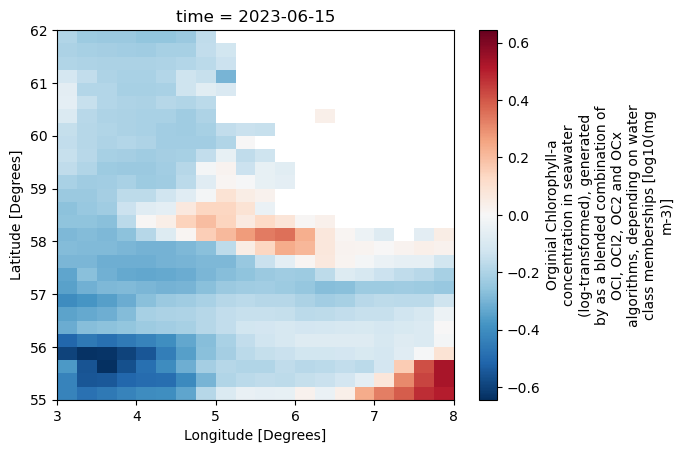

In [11]:
ds_sel["OC-CCI_chlor_a"].isel(time=0).plot()

---

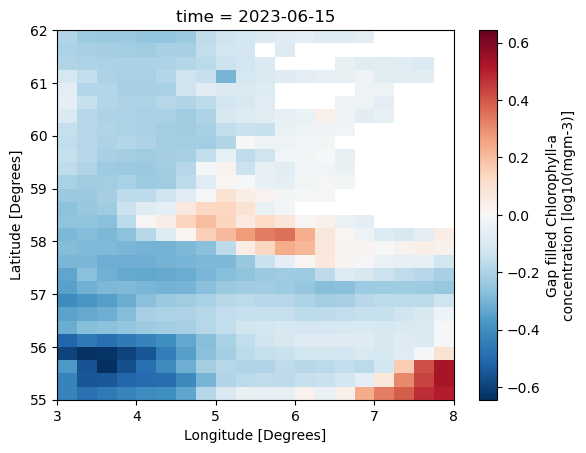

In [12]:
ds_sel["chl_filled"].isel(time=0).plot()

---
### Forecasting chlorophyll-a concentration in the North Sea 
https://zenodo.org/records/14932066 (only till 2020)

In [10]:
store = new_data_store("zenodo", root="14932066")

In [11]:
store.list_data_ids()

['FCWQ_xgb4_2016-2020_v1.0.zarr.zip',
 'FCWQ_bgcm_2016-2020_v1.0.zarr.zip',
 'FCWQ_xgb5_2016-2020_v1.0.zarr.zip',
 'FCWQ_xgb6_2016-2020_v1.0.zarr.zip',
 'FCWQ_cube_2016-2020_v3.0.zarr.zip',
 'FCWQ_xgb2_2016-2020_v1.0.zarr.zip',
 'FCWQ_xgb3_2016-2020_v1.0.zarr.zip',
 'FCWQ_xgb1_2016-2020_v1.0.zarr.zip',
 'FCWQ_xgb7_2016-2020_v1.0.zarr.zip']

In [12]:
ds = store.open_data("FCWQ_bgcm_2016-2020_v1.0.zarr.zip")
ds

<xarray.Dataset> Size: 16GB
Dimensions:  (time: 1225, depth: 13, lat: 469, lon: 527)
Coordinates:
  * time     (time) datetime64[ns] 10kB 2016-03-01 2016-03-02 ... 2020-10-31
  * depth    (depth) float32 52B -0.0 3.0 10.0 15.0 ... 125.0 150.0 200.0 250.0
  * lat      (lat) float64 4kB 58.0 57.98 57.97 57.95 ... 50.04 50.02 50.01
  * lon      (lon) float64 4kB 1.014 1.032 1.049 1.066 ... 9.965 9.982 9.999
Data variables:
    chl      (time, depth, lat, lon) float32 16GB dask.array<chunksize=(1225, 1, 67, 31), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.11
    acknowledgements:  Contains modified Copernicus Service information 2016,...
    creator:           Brockmann Consult GmbH
    funding:           ESA ITT for Future EO-1 EO Science for Society Permane...
    license:           CC BY-NC-ND 4.0, https://creativecommons.org/licenses/...
    uuid:              9ccd959c-5714-4a34-b647-9d73ddad200a

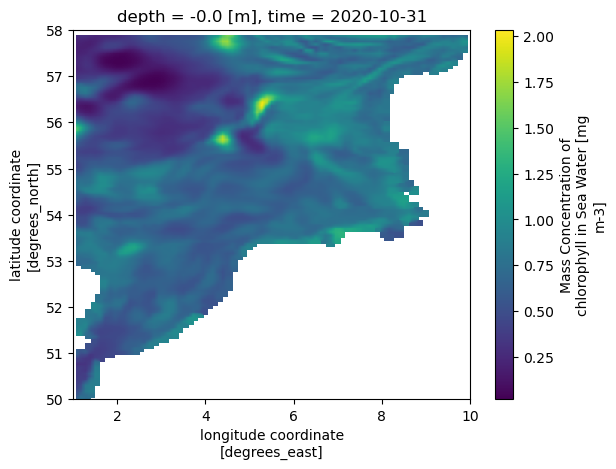

In [13]:
ds.chl.isel(time=-1, depth=0).plot()

---
### OCNET global daily Chlorophyll-a products
https://zenodo.org/records/17377256:  (only till 2023) -> **no coverage in North Sea**

In [14]:
store = new_data_store("zenodo", root="17377256")

In [15]:
store.list_data_ids()

['MHC_ncfile.rar',
 'example_data_OCNET.rar',
 'OCNET_chla_2003.zip',
 'OCNET_chla_2004.zip',
 'OCNET_chla_2005.zip',
 'OCNET_chla_2021.zip',
 'OCNET_chla_2020.zip',
 'OCNET_chla_2022.zip',
 'OCNET_chla_2023.zip',
 'OCNET_chla_2006.zip',
 'OCNET_chla_2009.zip',
 'OCNET_chla_2007.zip',
 'OCNET_chla_2008.zip',
 'OCNET_MainCode.zip',
 'OCNET_chla_2012.nc',
 'OCNET_chla_2010.zip',
 'OCNET_chla_2011.zip',
 'OCNET_chla_2014.zip',
 'OCNET_chla_2015.zip',
 'OCNET_chla_2013.zip',
 'OCNET_chla_2017.zip',
 'OCNET_chla_2016.zip',
 'OCNET_chla_2018.zip',
 'OCNET_chla_2019.zip',
 'OCNET_chla_2001.zip',
 'OCNET_chla_2002.zip']

In [17]:
cache_store = store.preload_data('OCNET_chla_2023.zip')

Data ID,Status,Progress,Message,Exception
OCNET_chla_2023.zip,COMPLETED,-,Already preloaded,-


In [18]:
cache_store.list_data_ids()

['OCNET_chla_2023.nc']

In [21]:
ds = cache_store.open_data("OCNET_chla_2023.nc", chunks="auto")
ds

<xarray.Dataset> Size: 3GB
Dimensions:    (Columns: 1440, Rows: 721, time: 365, Longitude: 1440,
                Latitude: 721)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2023-01-02 2023-01-03 ... 2024-01-01
Dimensions without coordinates: Columns, Rows, Longitude, Latitude
Data variables:
    longitude  (Columns, Rows) float64 8MB dask.array<chunksize=(1440, 721), meta=np.ndarray>
    latitude   (Columns, Rows) float64 8MB dask.array<chunksize=(1440, 721), meta=np.ndarray>
    Chla       (time, Longitude, Latitude) float64 3GB dask.array<chunksize=(129, 509, 255), meta=np.ndarray>

In [38]:
chla = xr.DataArray(
    ds.Chla.data,
    coords=dict(lat=ds.latitude[0, :].data, lon=ds.longitude[:, 0].data, time=ds.time),
    dims=("time", "lon", "lat")
).transpose("time", "lat", "lon")
chla

<xarray.DataArray 'open_dataset-Chla-5350a51277ecb6ce5d819c6f456de448' (
                                                                        time: 365,
                                                                        lat: 721,
                                                                        lon: 1440)> Size: 3GB
dask.array<transpose, shape=(365, 721, 1440), dtype=float64, chunksize=(129, 255, 509), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 3kB 2023-01-02 2023-01-03 ... 2024-01-01
  * lat      (lat) float64 6kB 90.12 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * lon      (lon) float64 12kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9

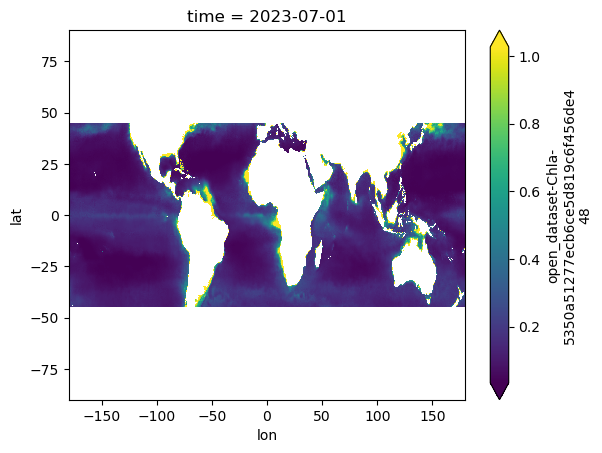

In [44]:
chla.isel(time=180).plot(robust=True)